In [160]:
import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time
from tkinter import TclError
from scipy.io import wavfile as wav
from scipy.fftpack import fft

# use this backend to display in separate Tk window
%matplotlib inline

In [4]:
# constants
CHUNK = 1024 * 2             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second

In [51]:
Fs, data = wav.read('song.wav')

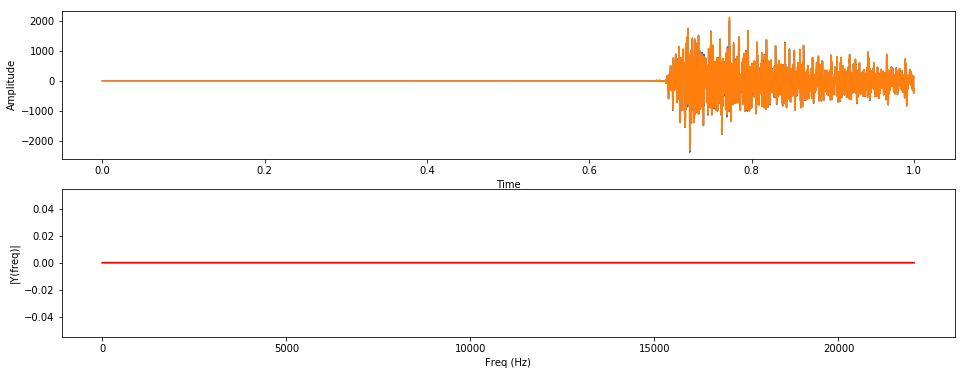

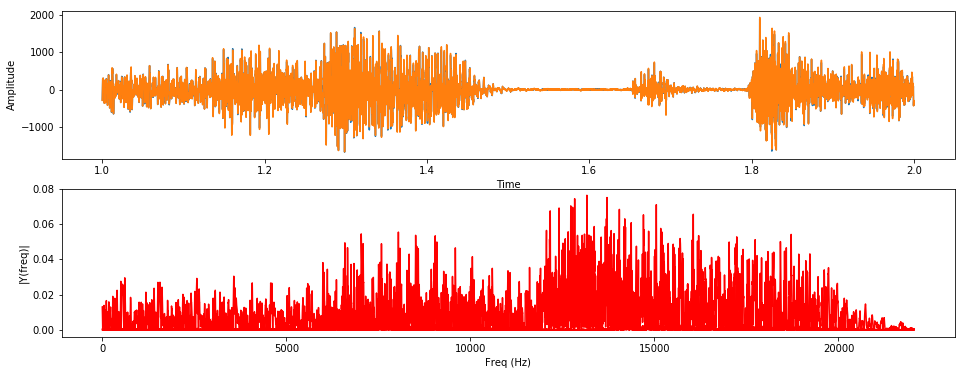

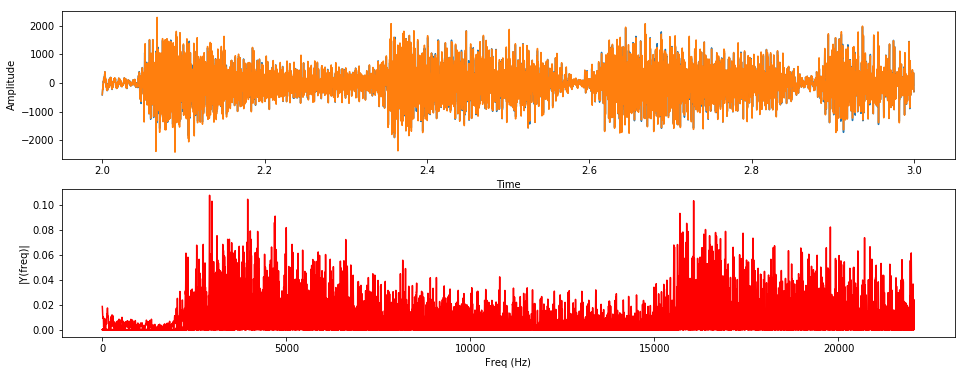

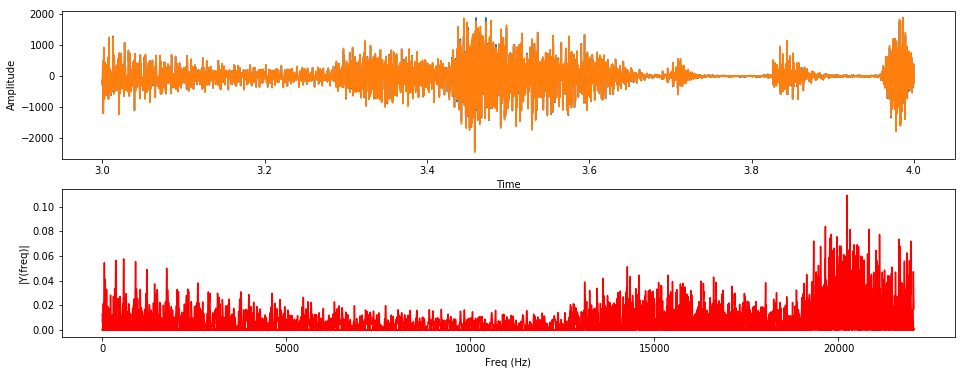

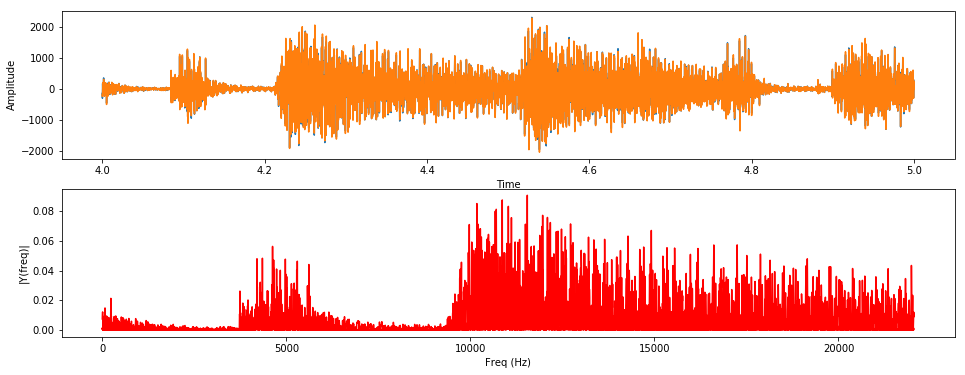

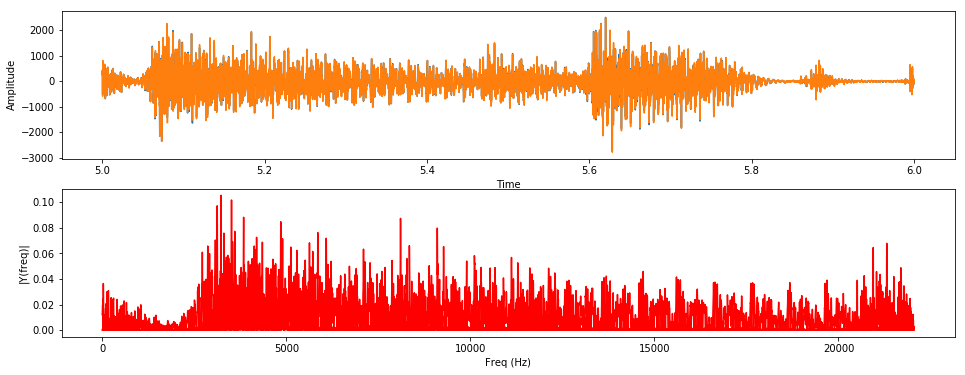

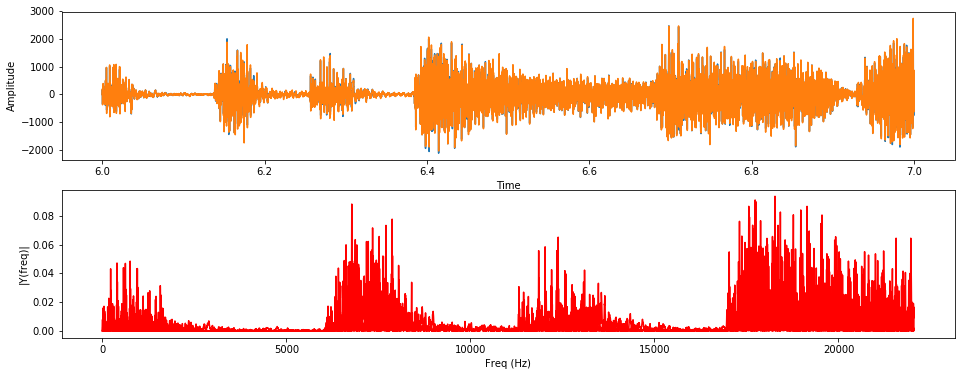

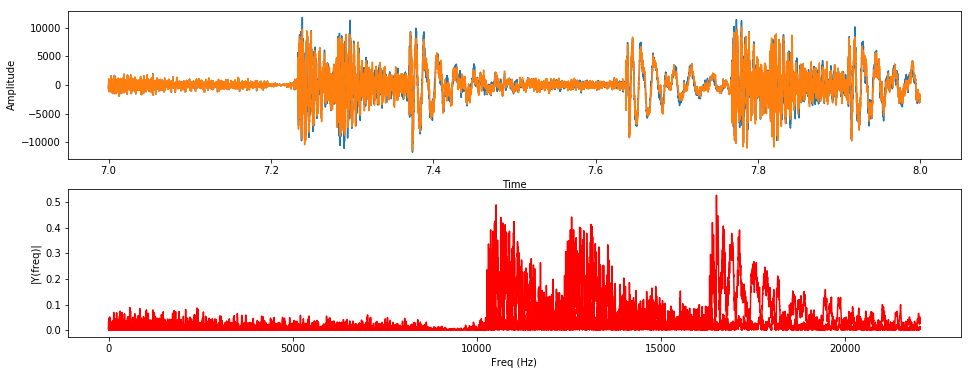

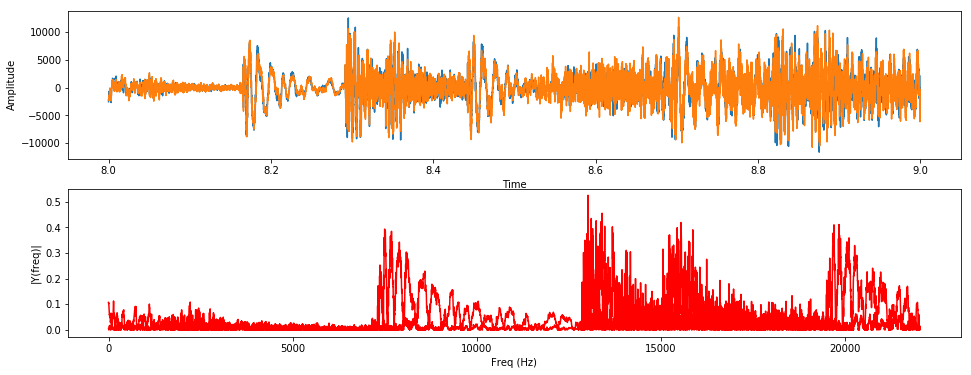

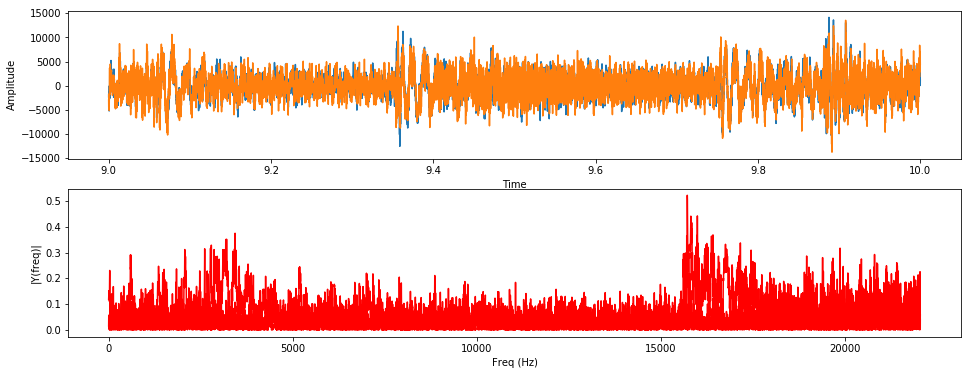

In [194]:
for i in range(0,10):
    Ts = 1.0/Fs
    t = np.arange(i,i+1,Ts) # time vector

    y = data[i * 44100: ((i * 44100) + 44100)]

    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range

    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig = plt.figure(figsize=(16, 6)) 
    gs = gridspec.GridSpec(2, 1) 

    ax[0] = plt.subplot(gs[0])
    ax[1] = plt.subplot(gs[1])

    ax[0].plot(t,y)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')

    ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|');

In [ ]:
# create a line object with random data
line, = ax.plot(x, np.random.rand(CHUNK), '-', lw=2)

# basic formatting for the axes
ax.set_title('AUDIO WAVEFORM')
ax.set_xlabel('samples')
ax.set_ylabel('volume')
ax.set_ylim(0, 255)
ax.set_xlim(0, 2 * CHUNK)
plt.setp(ax, xticks=[0, CHUNK, 2 * CHUNK], yticks=[0, 128, 255])

# show the plot
plt.show(block=False)

print('stream started')

# for measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    
    # binary data
    data = stream.read(CHUNK)  
    
    # convert data to integers, make np array, then offset it by 127
    data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    
    # create np array and offset by 128
    data_np = np.array(data_int, dtype='b')[::2] + 128
    
    line.set_ydata(data_np)
    
    # update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
        
    except TclError:
        
        # calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break